In [2]:
# Importing Libraries

from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Read the text file of the sentences, equivalent english like words of the texts in the image

base_path = "C:/Users/Dell/Machine Learning Project (Deep Learning)/sentences"
sentence_list = []

sentences = open(f"{base_path}/sentences.txt", "r").readlines()
for line in sentences:
    if line[0] == "#":
        continue
    if line.split(" ")[1] != "err":  # We don't need to deal with errored entries.
        sentence_list.append(line)

len(sentence_list)

np.random.shuffle(sentence_list)
sentence_list

['c03-084d-s01-04 1 ok 157 11 352 2024 1865 116 theme|of|the|destructive|power|of|unbridled\n',
 "k04-136-s02-00 2 ok 175 27 737 1079 1422 214 '|Have|you|ever|heard|of|a|punishment|called\n",
 'a01-117u-s02-00 2 ok 170 1 2048 1536 178 51 Then\n',
 'h04-082-s00-01 0 ok 180 43 383 1030 1740 98 years|cannot|be|made|so|precisely|as|in|groups|with|a\n',
 'g06-011b-s05-03 5 ok 162 21 377 2463 1555 140 a|favourable|change|in|my|eye|,\n',
 'n04-000-s03-00 3 ok 176 10 1719 962 391 77 "|I|did|,|"|he\n',
 'p03-096-s03-01 3 ok 182 26 386 1427 1706 131 great|pleasure|in|telling|that|young|man\n',
 'b06-004-s01-04 1 ok 186 4 334 1615 220 75 clear|.\n',
 'g06-042r-s00-00 0 ok 168 29 351 598 1693 70 Nor|is|this|to|be|wondered|at|,|for|even|today|,|in\n',
 'p03-173-s06-03 6 err 191 30 352 2154 1420 98 receive|a|sharp|slap|for|his|pains|.\n',
 'g06-011f-s01-00 1 ok 203 1 2018 712 74 67 He\n',
 'g01-012-s00-01 0 ok 153 22 359 1043 1975 153 moment|had|charge|of|the|mine|;|the|mine|collapsed\n',
 'n04-092-

In [4]:
# split these into train and test samples

split_idx = int(0.9 * len(sentence_list))
train_samples = sentence_list[:split_idx]
test_samples = sentence_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(sentence_list) == len(train_samples) + len(validation_samples) + len(
    test_samples
)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 15076
Total validation samples: 838
Total test samples: 838


In [5]:
# get the image paths by mapping the folder path with the image names

base_path = "C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\"
base_image_path = os.path.join(base_path, "sentences")

def get_image_paths_and_labels(samples):
    paths = []
    corrected_samples = []
    for (i, file_line) in enumerate(samples):
        line_split = file_line.strip()
        line_split = line_split.split(" ")

        # Each line split will have this format for the corresponding image:
        # part1/part1-part2/part1-part2-part3.png
        image_name = line_split[0]
        partI = image_name.split("-")[0]
        partII = image_name.split("-")[1]
        img_path = os.path.join(
            base_image_path, partI, partI + "-" + partII, image_name + ".png"
        )
        if os.path.getsize(img_path):
            paths.append(img_path)
            corrected_samples.append(file_line.split("\n")[0])

    return paths, corrected_samples


train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)



In [6]:
train_img_paths

['C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\c03\\c03-084d\\c03-084d-s01-04.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\k04\\k04-136\\k04-136-s02-00.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\a01\\a01-117u\\a01-117u-s02-00.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\h04\\h04-082\\h04-082-s00-01.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\g06\\g06-011b\\g06-011b-s05-03.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\n04\\n04-000\\n04-000-s03-00.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\p03\\p03-096\\p03-096-s03-01.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\b06\\b06-004\\b06-004-s01-04.png',
 'C:\\Users\\Dell\\Machine Learning Project (Deep Learning)\\sentences\\g06\\g06-042r\\g06-042r-s00-00.png',
 'C:\\Users\\Dell\\Machine Le

In [7]:
train_labels

['c03-084d-s01-04 1 ok 157 11 352 2024 1865 116 theme|of|the|destructive|power|of|unbridled',
 "k04-136-s02-00 2 ok 175 27 737 1079 1422 214 '|Have|you|ever|heard|of|a|punishment|called",
 'a01-117u-s02-00 2 ok 170 1 2048 1536 178 51 Then',
 'h04-082-s00-01 0 ok 180 43 383 1030 1740 98 years|cannot|be|made|so|precisely|as|in|groups|with|a',
 'g06-011b-s05-03 5 ok 162 21 377 2463 1555 140 a|favourable|change|in|my|eye|,',
 'n04-000-s03-00 3 ok 176 10 1719 962 391 77 "|I|did|,|"|he',
 'p03-096-s03-01 3 ok 182 26 386 1427 1706 131 great|pleasure|in|telling|that|young|man',
 'b06-004-s01-04 1 ok 186 4 334 1615 220 75 clear|.',
 'g06-042r-s00-00 0 ok 168 29 351 598 1693 70 Nor|is|this|to|be|wondered|at|,|for|even|today|,|in',
 'p03-173-s06-03 6 err 191 30 352 2154 1420 98 receive|a|sharp|slap|for|his|pains|.',
 'g06-011f-s01-00 1 ok 203 1 2018 712 74 67 He',
 'g01-012-s00-01 0 ok 153 22 359 1043 1975 153 moment|had|charge|of|the|mine|;|the|mine|collapsed',
 'n04-092-s05-01 5 ok 184 4 362 21

In [8]:
train_samples

['c03-084d-s01-04 1 ok 157 11 352 2024 1865 116 theme|of|the|destructive|power|of|unbridled\n',
 "k04-136-s02-00 2 ok 175 27 737 1079 1422 214 '|Have|you|ever|heard|of|a|punishment|called\n",
 'a01-117u-s02-00 2 ok 170 1 2048 1536 178 51 Then\n',
 'h04-082-s00-01 0 ok 180 43 383 1030 1740 98 years|cannot|be|made|so|precisely|as|in|groups|with|a\n',
 'g06-011b-s05-03 5 ok 162 21 377 2463 1555 140 a|favourable|change|in|my|eye|,\n',
 'n04-000-s03-00 3 ok 176 10 1719 962 391 77 "|I|did|,|"|he\n',
 'p03-096-s03-01 3 ok 182 26 386 1427 1706 131 great|pleasure|in|telling|that|young|man\n',
 'b06-004-s01-04 1 ok 186 4 334 1615 220 75 clear|.\n',
 'g06-042r-s00-00 0 ok 168 29 351 598 1693 70 Nor|is|this|to|be|wondered|at|,|for|even|today|,|in\n',
 'p03-173-s06-03 6 err 191 30 352 2154 1420 98 receive|a|sharp|slap|for|his|pains|.\n',
 'g06-011f-s01-00 1 ok 203 1 2018 712 74 67 He\n',
 'g01-012-s00-01 0 ok 153 22 359 1043 1975 153 moment|had|charge|of|the|mine|;|the|mine|collapsed\n',
 'n04-092-

In [9]:
# Find maximum length and the size of the vocabulary in the training data.
# Basic EDA

train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)

    max_len = max(max_len, len(label))
    train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
# print(len(label))
#print("Vocab size: ", len(characters))

# Check some label samples.
# train_labels_cleaned[:10]


Maximum length:  93


In [10]:
# Remove Leading spaces, i.e before the text, 
# extracting the english labels from the entire path, bounding box and image name for testing and validation samples

def clean_labels(labels):
    cleaned_labels = []
    for label in labels:
        label = label.split(" ")[-1].strip()
        cleaned_labels.append(label)
    return cleaned_labels


validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

In [11]:
validation_labels

['a06-044-s02-00 2 ok 162 2 1989 1117 93 70 He',
 'r03-110-s01-01 1 ok 178 23 335 1459 1925 123 one|of|your|publishers|,|get|two|books|commissioned',
 'k07-176-s07-03 7 ok 173 20 370 2439 1767 87 remembered|the|clinical|weekends',
 'g06-031m-s03-01 3 ok 182 8 362 984 1111 122 really|tremble|for|my|country|!',
 'r06-022-s02-03 2 ok 182 14 345 1623 1217 91 curling|white|breath|of|the|mountains|.',
 'm06-106-s04-00 4 ok 158 13 1584 1867 604 79 To|sail|up|in|the',
 'c03-003e-s00-00 0 ok 178 16 298 750 1182 165 This|is|not|a|filmed|play|.',
 'm04-152-s04-00 4 ok 198 30 1192 1441 995 109 "|Broughtons|,|"|he|said|silkily|.',
 'm03-013-s05-01 5 err 189 12 396 1810 404 80 head-shrinkers|.',
 'p02-090-s00-00 0 ok 177 18 371 726 1671 94 The|others|were|all|dancing|and',
 'g07-018a-s02-03 2 ok 168 43 287 2306 2031 95 lack|of|pretension|,|he|even|succeeded|in|disarming',
 'p03-121-s05-00 5 err 182 5 2052 1097 171 112 "|Well|,',
 'c04-004-s02-02 2 ok 182 43 359 1810 1731 111 doing|better|here|,|befo

In [12]:
test_labels_cleaned

['Underwater|films|suggest|that|the',
 'They|followed|him|to|a|city|bus|stop|on|Carling|Avenue|,|where',
 '(|+9|to|-9|)|and|beverages|other|than',
 'substantial|change|was|in|families|with|three|children|,',
 'story|,|which|is|also|in|the|Hagadah|that',
 'Before|he|could|open|his|mouth|,|the|collector',
 'allowances|were|introduced|in|October|1956|,|and|the|welfare',
 'into|being|in|April|,|1958|,|with|Dr.|Andrew|Hood|as',
 'jolly|,|"|had|been|unmarried|,|and|lived|at|Lavender|Hill|,',
 "babies|may|be|born|with|wings|.|'",
 'TO|HAVE|FOUND|EVERYTHING|IN|UTTERMOST',
 'little|sorry|if|we|were|not|back|for|Christmas',
 'precisely|the|reasons|why|her|cousin|took',
 'The|Bill|is',
 'distorted|if|activity|other|than|bismuth-',
 'would|be|taken|home|.',
 'whether|America|was|lagging|behind',
 'during|the|swim|(|the|swim|at|East|Anglia',
 'like|.',
 'me|at|the|gate|,|four|o\'clock|tomorrow|?|"',
 'Of|course|,|in|any|speech|a|good',
 'But|perhaps|in|the',
 'decided|advantage|of|being|the|only',


In [13]:
# char_to_num - tensors cannot hold characters i.e texts in the image, 
# therefore they are converted to pixels (char to num & then ascii equivalents) stored as matrices of numbers in a tensor

AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


In [14]:
# Resize the image - standardize the size of all the training input images
# Compress/ enlarge it to 128*32 - this results in a super distorted image when compressed/enlarged
# function to compress or enlarge the image

# Padding is a technique to standardize the image to a specific size because it does not distort input matter
# With this stage, images are ready to be trained

def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

    # Check the amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )

    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    return image


In [30]:
# functions to read the image, standardize it, convert the characters to pixels to store in tensor and preprocess the image labels
# prepare a training dataset that has these images which are ready to be trained


batch_size = 64
padding_token = 99
image_width = 128
image_height = 32


def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image


def vectorize_label(label):
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    length = tf.shape(label)[0]
    pad_amount = max_len - length
    label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
    return label


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE
    )
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)



In [32]:
# call the respective functions to prepare the training, valiation and testing dataset

train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)

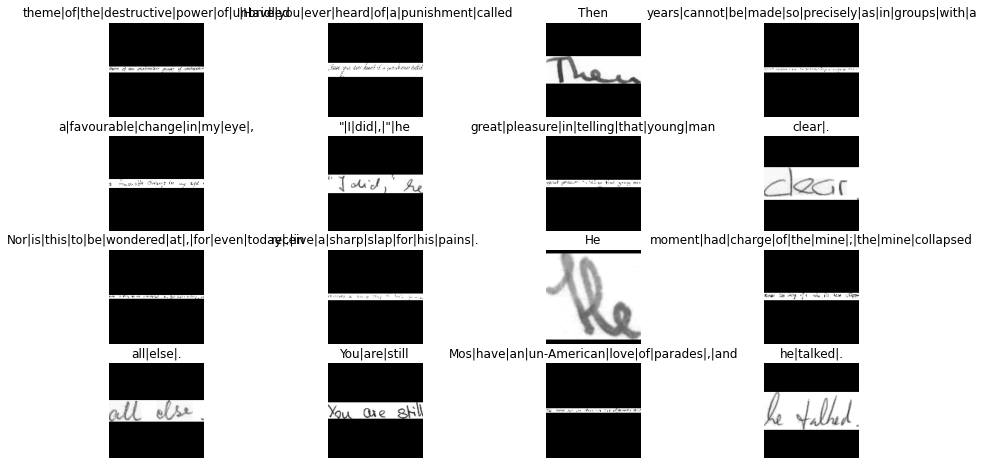

In [33]:
# padding output, the images after resizing are filled with black boxes without distorting the input

for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [34]:
# CTC Layer

class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")
        #ignore_longer_outputs_than_inputs=True
        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred

In [35]:
# Build the model
# Rectified Linear Unit(RELU) , activated after input reaches a certain number
# When one of the input neurons is above 0
# First Layer - NN - pixel values - magnitude of black shading ( 1- bloack, 0 - white)
# Second Layer - Black Box/ Hidden Layer

def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))

    # First conv layer.
    x = keras.layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    
    #3 First Maxpooling layer
    x = keras.layers.MaxPooling2D(
        (2, 2), name="pool1")(x)

    # Second conv layer.
    x = keras.layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    
    # MaxPooling layer.
    x = keras.layers.MaxPooling2D(
        (2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 64)
    
    x = keras.layers.Reshape(
        target_shape=new_shape, name="reshape")(x)
    
    x = keras.layers.Dense(
        64, activation="relu", name="dense1")(x)
    
    x = keras.layers.Dropout(
        0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
    )(x)
    
    x = keras.layers.Bidirectional(
        keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
    )(x)

    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(
        len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
    )
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  320         ['image[0][0]']                  
                                )                                                                 
                                                                                                  
 pool1 (MaxPooling2D)           (None, 64, 64, 32)   0           ['Conv1[0][0]']                  
                                                                             

In [36]:
validation_images = []
validation_labels = []

for batch in validation_ds:
    validation_images.append(batch["image"])
    validation_labels.append(batch["label"])

In [37]:
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=input_len, greedy=True
    )[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )


In [38]:
epochs = 2  # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    callbacks=[edit_distance_callback],
)

Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node 'handwriting_recognizer/ctc_loss/CTCLoss' defined at (most recent call last):
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-38-d9597973c851>", line 10, in <module>
      history = model.fit(
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "<ipython-input-34-9af9ba39b8c2>", line 15, in call
      loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\backend.py", line 6583, in ctc_batch_cost
      tf.compat.v1.nn.ctc_loss(
Node: 'handwriting_recognizer/ctc_loss/CTCLoss'
Not enough time for target transition sequence (required: 93, available: 32)0You can turn this error into a warning by using the flag ignore_longer_outputs_than_inputs
	 [[{{node handwriting_recognizer/ctc_loss/CTCLoss}}]] [Op:__inference_train_function_47474]

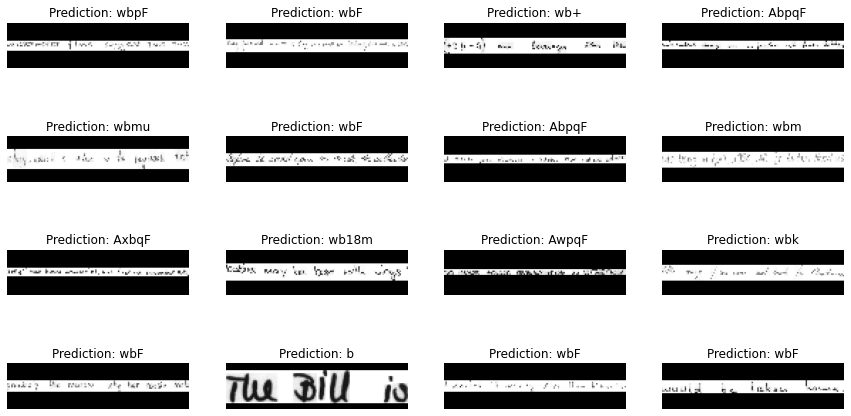

In [31]:
# A utility function to decode the output of the network.
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()